## Importando bibliotecas e base de dados

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Import Prophet

In [3]:
gold_stock_df = pd.read_csv(r"C:\Users\Dell\Desktop\Projetos Python\gold_stock_prices\data\goldstock.csv")

## Explorando a base de dados

In [5]:
gold_stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2511 non-null   int64  
 1   Date        2511 non-null   object 
 2   Close       2511 non-null   float64
 3   Volume      2511 non-null   float64
 4   Open        2511 non-null   float64
 5   High        2511 non-null   float64
 6   Low         2511 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 137.4+ KB


In [6]:
gold_stock_df.shape

(2511, 7)

In [7]:
gold_stock_df.head()

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


In [8]:
gold_stock_df.tail()

,Unnamed: 0,Date,Close,Volume,Open,High,Low
2506,2528,2014-01-28,1250.5,81426.0,1254.9,1261.9,1248.0
2507,2529,2014-01-27,1263.5,63419.0,1269.9,1280.1,1252.0
2508,2530,2014-01-24,1264.5,34998.0,1264.3,1273.2,1256.9
2509,2531,2014-01-23,1262.5,41697.0,1235.1,1267.1,1230.8
2510,2532,2014-01-22,1238.6,80262.0,1240.5,1243.5,1235.5


In [9]:
round(gold_stock_df.describe(), 2)

,Unnamed: 0,Close,Volume,Open,High,Low
count,2511.00,2511.00,2511.00,2511.00,2511.00,2511.00
mean,1260.79,1498.73,185970.77,1498.73,1508.45,1488.87
std,729.26,298.82,97600.77,299.12,301.26,296.42
min,0.00,1049.60,1.00,1051.50,1062.70,1045.40
25%,630.50,1249.85,126693.50,1249.50,1257.30,1242.35
50%,1259.00,1332.80,175421.00,1334.00,1342.40,1326.60
75%,1888.50,1805.85,234832.00,1805.60,1815.45,1793.05
max,2532.00,2093.10,787217.00,2094.40,2098.20,2074.60


In [10]:
missing_values = gold_stock_df.isnull().sum()
missing_values

Unnamed: 0    0
Date          0
Close         0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [11]:
gold_stock_df.duplicated().sum()

0

In [12]:
gold_stock_df.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)

In [22]:
gold_stock_df.drop(columns=['Index'],inplace=True,axis=1)
gold_stock_df.head()

,Date,Close,Volume,Open,High,Low
0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


<Axes: xlabel='Date'>

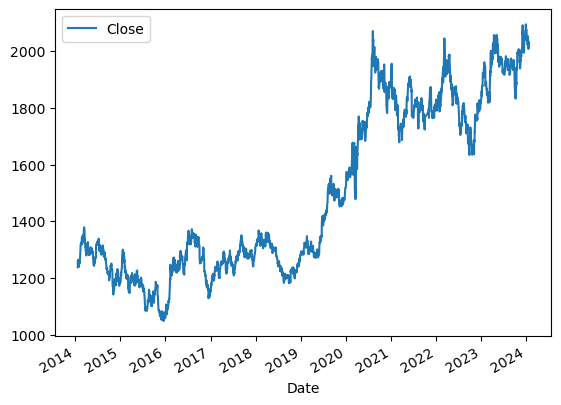

In [23]:
# Plotando alguns gráficos
# Data e valor no fechamento
gold_stock_df.plot(x="Date", y="Close")

In [24]:
gold_stock_df["Date"] = pd.to_datetime(gold_stock_df["Date"])

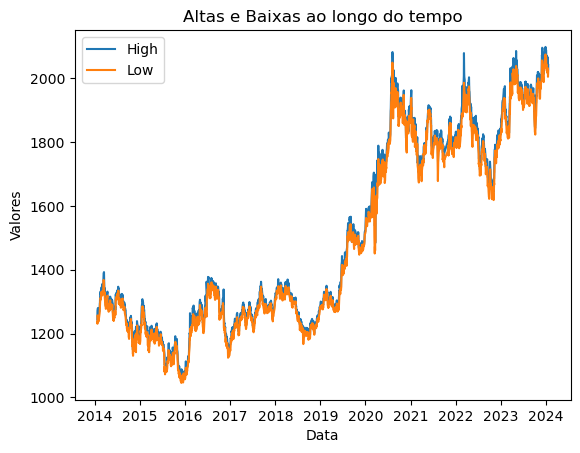

In [25]:
# Valoes altos e baixos ao longo do tempo
high = gold_stock_df["High"]
low = gold_stock_df["Low"]
plt.plot(gold_stock_df["Date"], high, label="High",)
plt.plot(gold_stock_df["Date"], low, label="Low")
plt.title('Altas e Baixas ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Valores')
plt.legend()
plt.show()

<Axes: xlabel='High', ylabel='Count'>

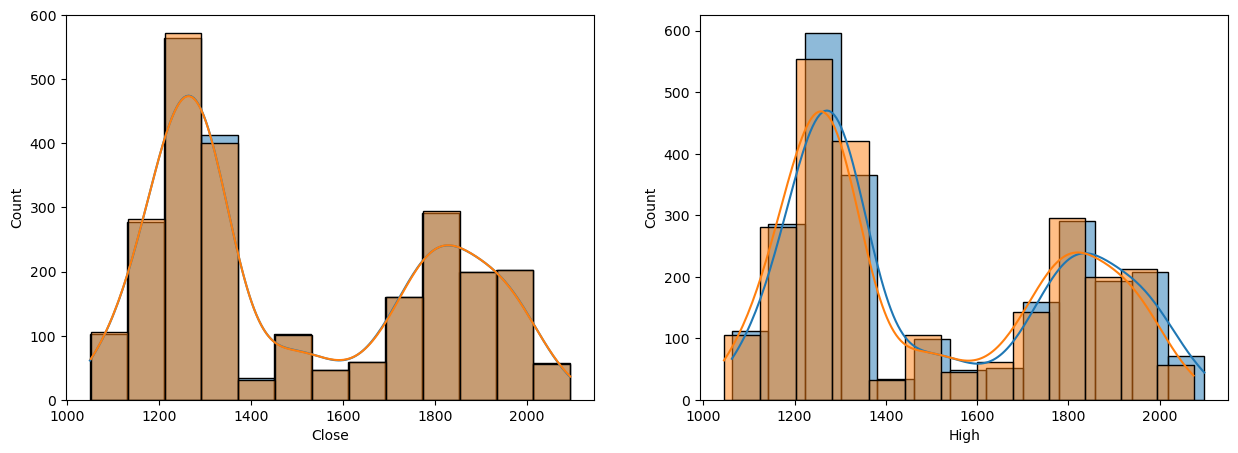

In [26]:
figure,axes = plt.subplots(1,2,figsize=(15,5))

sns.histplot(gold_stock_df['Close'],kde=True,ax=axes[0])
sns.histplot(gold_stock_df['Open'],kde=True,ax=axes[0])
sns.histplot(gold_stock_df['High'],kde=True,ax=axes[1])
sns.histplot(gold_stock_df['Low'],kde=True,ax=axes[1])

## Vizualização dos dados antes das previões

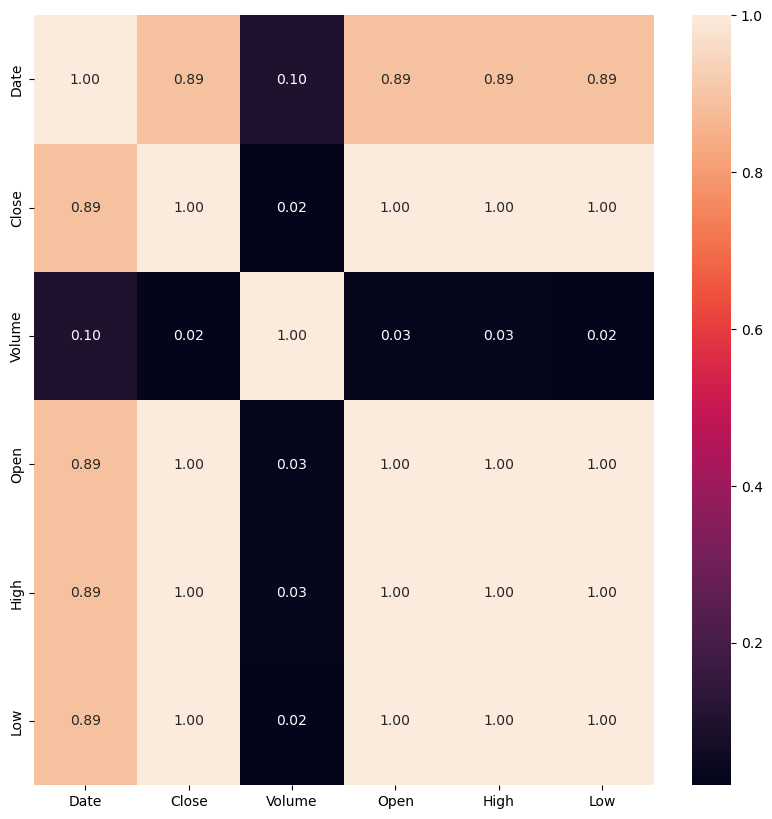

In [34]:
correlations = gold_stock_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlations, annot=True, fmt=".2f")
plt.show()

In [32]:
!pip install prophet

In [64]:
from prophet import Prophet

In [35]:
gold_stock_df['Year'] = pd.DatetimeIndex(gold_stock_df['Date']).year
gold_stock_df.head()

,Date,Close,Volume,Open,High,Low,Year
0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2,2024
1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7,2024
2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6,2024
3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6,2024
4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1,2024


In [36]:
gold_stock_df['Month'] = pd.DatetimeIndex(gold_stock_df['Date']).month
gold_stock_df.head()

,Date,Close,Volume,Open,High,Low,Year,Month
0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2,2024,1
1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7,2024,1
2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6,2024,1
3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6,2024,1
4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1,2024,1


In [37]:
gold_stock_df['Day'] = pd.DatetimeIndex(gold_stock_df['Date']).day
gold_stock_df.head()

,Date,Close,Volume,Open,High,Low,Year,Month,Day
0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2,2024,1,19
1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7,2024,1,18
2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6,2024,1,17
3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6,2024,1,16
4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1,2024,1,12


Text(0.5, 1.0, 'Média do fechamento por dia')

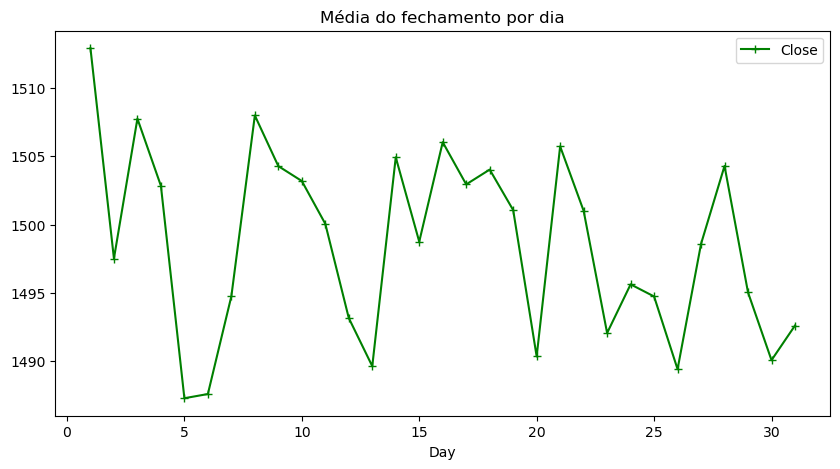

In [50]:
axis = gold_stock_df.groupby('Day')[['Close']].mean().plot(figsize=(10,5), marker = '+', color = 'g')
axis.set_title('Média do fechamento por dia')

Text(0.5, 1.0, 'Média do fechamento por mês')

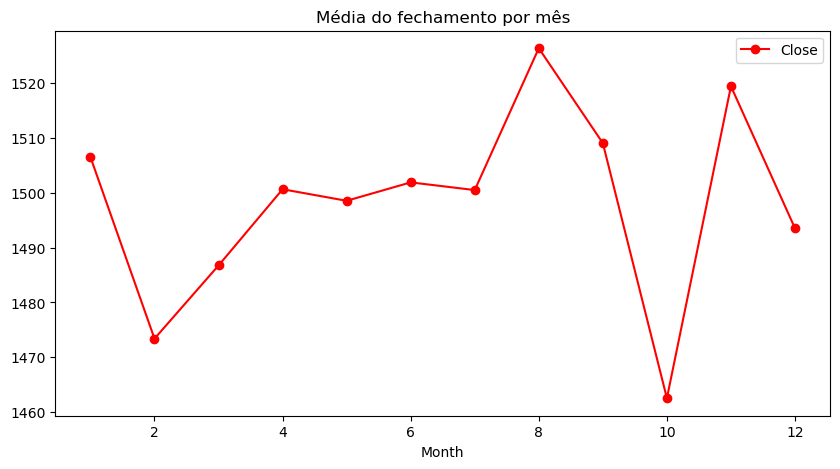

In [40]:
axis = gold_stock_df.groupby('Month')[['Close']].mean().plot(figsize=(10,5), marker = 'o', color = 'r')
axis.set_title('Média do fechamento por mês')

Text(0.5, 1.0, 'Média do fechamento por ano')

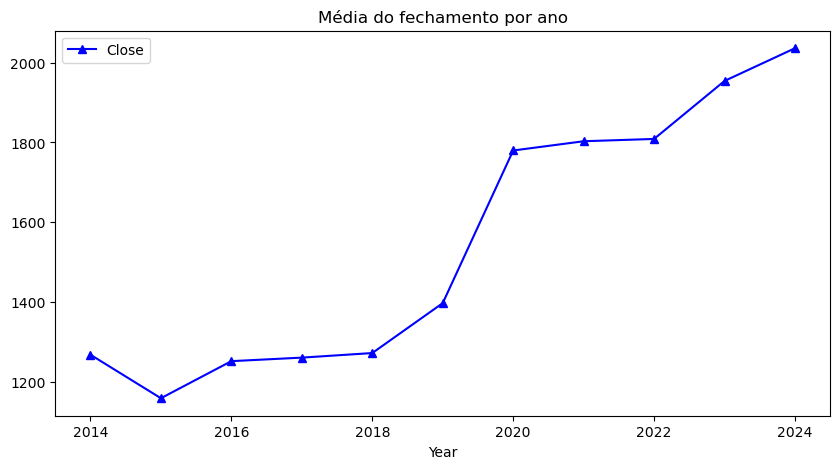

In [47]:
axis = gold_stock_df.groupby('Year')[['Close']].mean().plot(figsize=(10,5), marker = '^', color = 'b')
axis.set_title('Média do fechamento por ano')

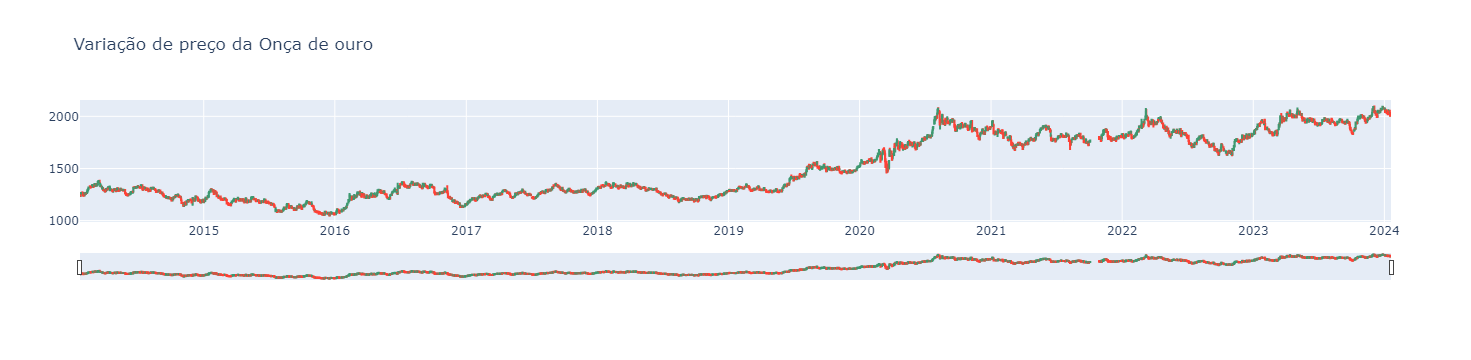

In [86]:
# Gráfico interativo para vizualização geral
fig = go.Figure(data=[go.Candlestick(x=gold_stock_df['Date'],
                open=gold_stock_df['Open'],
                high=gold_stock_df['High'],
                low=gold_stock_df['Low'],
                close=gold_stock_df['Close'])])

fig.update_layout(title="Variação de preço da Onça de ouro")
fig.show()

## Treinando o modelo e fazendo as previsões com o Prophet

In [75]:
# Date : ds
# Sales : y 
# Date : ds
# Sales : y 
def close_predictions(gold_df, periods):
    gold_df = gold_df[['Date', 'Close']].rename(columns = {'Date': 'ds', 'Close': 'y'})
    gold_df = gold_df.sort_values(by = 'ds')

    model = Prophet()
    model.fit(gold_df)
    future = model.make_future_dataframe(periods = periods)
    forecast = model.predict(future)
    figure1 = model.plot(forecast, xlabel = 'Data', ylabel = 'Close')
    figure2 = model.plot_components(forecast)

    return gold_stock_df, forecast

14:13:56 - cmdstanpy - INFO - Chain [1] start processing
14:13:57 - cmdstanpy - INFO - Chain [1] done processing


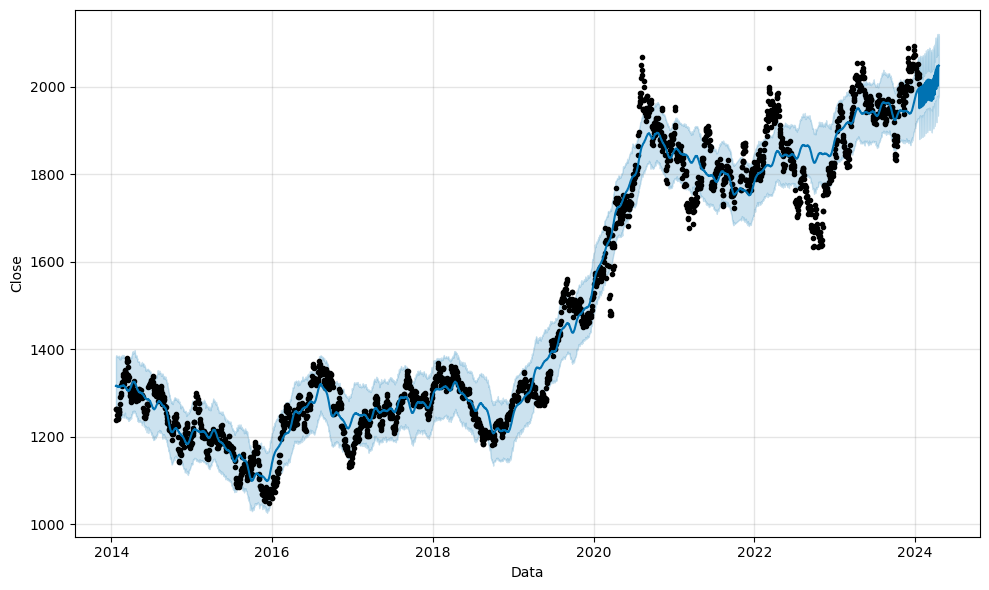

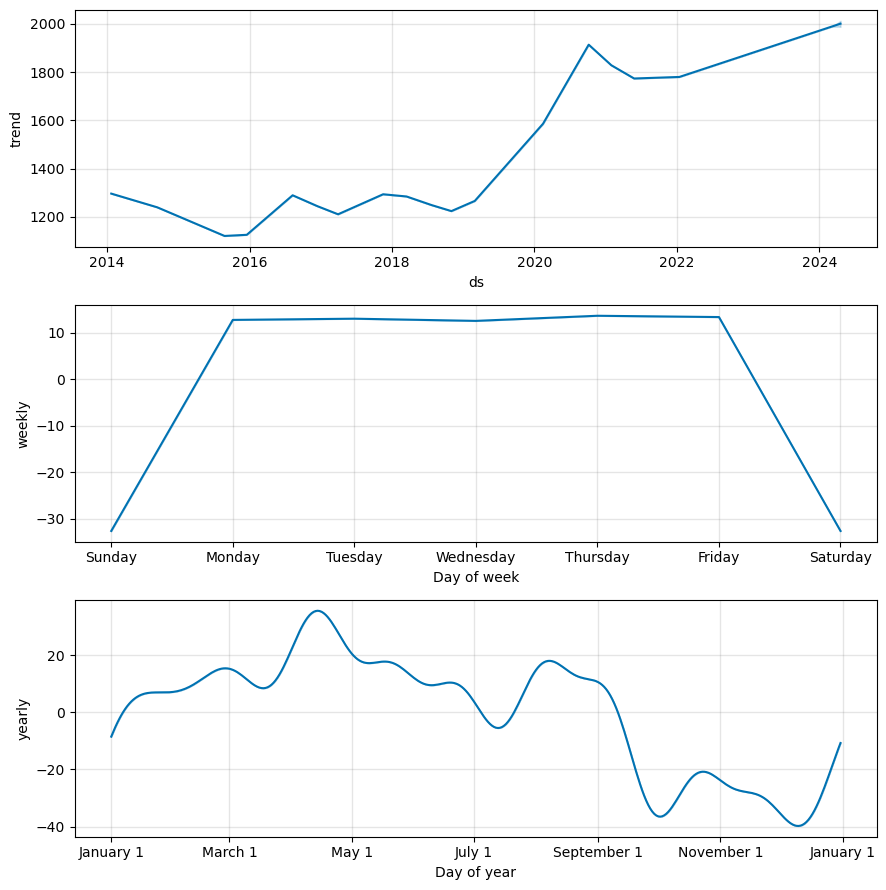

In [80]:
df_origin, df_prediction = close_predictions(gold_stock_df, 90)

In [81]:
df_origin.shape, df_prediction.shape

((2511, 9), (2583, 19))

In [82]:
df_prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2578,2024-04-14,1999.786082,1934.912579,2073.082579,1988.081123,2010.455152,2.886281,2.886281,2.886281,-32.680595,-32.680595,-32.680595,35.566876,35.566876,35.566876,0.0,0.0,0.0,2002.672363
2579,2024-04-15,2000.053258,1978.351596,2118.717321,1987.988634,2011.103358,48.191241,48.191241,48.191241,12.761177,12.761177,12.761177,35.430064,35.430064,35.430064,0.0,0.0,0.0,2048.244499
2580,2024-04-16,2000.320434,1980.334546,2121.039485,1987.903500,2011.667388,48.136290,48.136290,48.136290,13.023480,13.023480,13.023480,35.112809,35.112809,35.112809,0.0,0.0,0.0,2048.456723
2581,2024-04-17,2000.587609,1975.948466,2115.493634,1987.818366,2012.152150,47.175030,47.175030,47.175030,12.549643,12.549643,12.549643,34.625387,34.625387,34.625387,0.0,0.0,0.0,2047.762640
2582,2024-04-18,2000.854785,1979.691802,2119.024921,1987.732444,2012.965266,47.634348,47.634348,47.634348,13.653187,13.653187,13.653187,33.981161,33.981161,33.981161,0.0,0.0,0.0,2048.489132


In [84]:
df_origin.head()

,Date,Close,Volume,Open,High,Low,Year,Month,Day
0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2,2024,1,19
1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7,2024,1,18
2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6,2024,1,17
3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6,2024,1,16
4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1,2024,1,12
